<header style="background-color: rgb(0, 62, 92); color: white; margin-top: 20px; padding:28px; ">
  <img src="Xlogo.png" alt="Transposition of a vector" title="Vector transposition" width="115" style="float: left;">
  <p style=" text-align: center; font-size: 32px;">   
  <strong> Stratégie quantitative: Application au marché crédit  </strong></p>
  <p style=" text-align: center; font-size: 25px;"><strong> Projet de validation de module </strong></p>
  <p style=" text-align: center; font-size: 20px;">    SERE MODOU </p>
</header>

## Second notebook

**SUJET D'ÉTUDE :**  

**Etudier des séries de spreads et de valeurs relatives (spread contre secteur) : stationnarité, variations, autocorrélation, estimer des modèles de série temporelles (ARMA, modèles de type GARCH pour prendre en compte les variations de « volatilité »).**

Ce notebook nous permet de passer à la seconde phase du sujet : L'étude des valeurs relatives (des spreads contre secteur.) Comment allons nous donc procéder ? Pour ce faire, nous avons pris toujours les spreads de crédit du DJ ITraxx X-over 3Y mais cette fois couplés avec les spreads de crédit de maturité 3Y d'une société appartenant à l'Itraxx et dans le secteur automobile : Renault. L'idée pour nous consiste donc à étudier les valeurs relatives de renault contre le DJ ITraxx et inversement. Autrement dit, nous voulons étudier une série temporelle multi-variée d'un secteur bien particulier du DJ Itraxx X-over (l'automobile) contre l'indice lui meme. Comment ont t'il varié relativement ? 

### IMPORTATION DES DONNÉES ET ANALYSE DESCRIPTIVE

Notre base de donnée brute est un fichier Excel qui contient plusieurs feuilles ou sheets qui contiennent à leurs tours plusieurs informations sur le DJ Itraxx X-over 3Y et les spreads de crédit de Renault. Dans cette étape, nous avons importé séparément chaque feuille excel correspondant respectivement à Renault et au DJ Itraxx directement sur Python, les avons procésser pour ne retenir que celles des maturités 3Y et les avons fusionné pour obtenir une base unique avec deux séries temporelles intéragissant coinjointement.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
import warnings 

warnings.filterwarnings('ignore')

In [3]:
renault = pd.read_excel('/Users/nacersere/Downloads/FinancialCrisis.xlsx',sheet_name=[2],header=2)

In [4]:
renault = renault[2].loc[:,['Timestamp','Mid Spread Close']]

In [5]:
renault['Timestamp'] = pd.to_datetime(renault['Timestamp'])

In [6]:
renault.set_index('Timestamp',inplace=True)

In [7]:
renault.sort_index(ascending=True,inplace=True)

In [8]:
renault.rename(columns={'Mid Spread Close':'Renault Credit Spread'},inplace=True)

In [9]:
renault

,Renault Credit Spread
Timestamp,
2013-05-22,106.346
2013-05-23,117.237
2013-05-24,123.636
2013-05-27,123.631
2013-05-28,123.630
...,...
2023-05-15,216.075
2023-05-16,216.064
2023-05-17,216.055


In [10]:
Itraxx = pd.read_excel('/Users/nacersere/Downloads/FinancialCrisis.xlsx',sheet_name=[0],header=4)

In [11]:
Itraxx = Itraxx[0].loc[:,['Timestamp','Mid Spread Close']]

In [12]:
Itraxx

,Timestamp,Mid Spread Close
0,2023-05-19,354.35
1,2023-05-18,378.39
2,2023-05-17,378.38
3,2023-05-16,378.37
4,2023-05-15,378.37
...,...,...
2165,2015-01-08,244.53
2166,2015-01-07,264.03
2167,2015-01-06,272.03
2168,2015-01-05,260.53


In [13]:
Itraxx['Timestamp'] = pd.to_datetime(Itraxx['Timestamp'])

In [14]:
Itraxx.set_index('Timestamp',inplace=True)

In [15]:
Itraxx = Itraxx.sort_index(ascending=True)

In [16]:
Itraxx.rename(columns={'Mid Spread Close':'Itraxx Credit Spread'},inplace=True)

In [17]:
Itraxx

,Itraxx Credit Spread
Timestamp,
2015-01-02,240.53
2015-01-05,260.53
2015-01-06,272.03
2015-01-07,264.03
2015-01-08,244.53
...,...
2023-05-15,378.37
2023-05-16,378.37
2023-05-17,378.38


In [18]:
renau_Itraxx = pd.concat([Itraxx,renault],axis=1,join='inner')

**Représentation graphique**

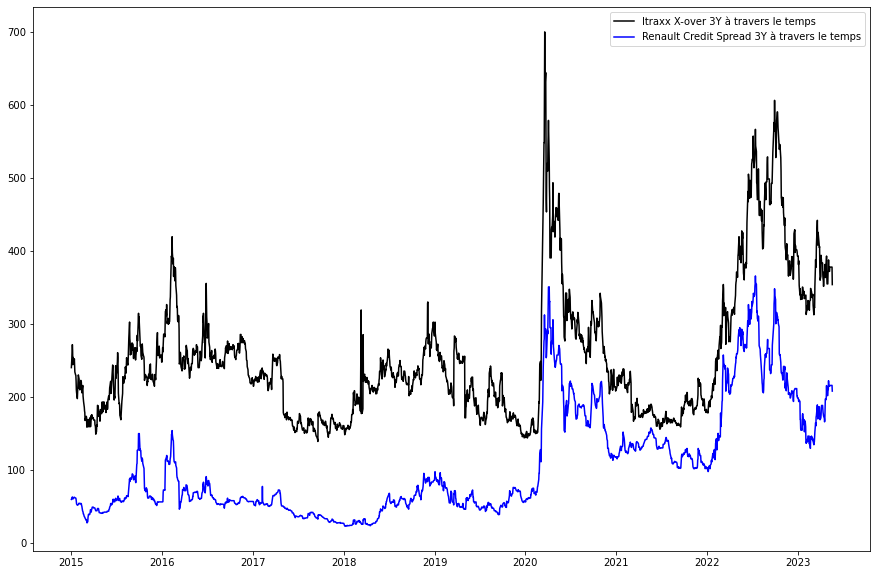

In [19]:
fig , ax = plt.subplots(figsize=(15,10))

ax.plot(renau_Itraxx.index,renau_Itraxx['Itraxx Credit Spread'],label='Itraxx X-over 3Y à travers le temps',color='Black')
ax.plot(renau_Itraxx.index,renau_Itraxx['Renault Credit Spread'],label='Renault Credit Spread 3Y à travers le temps',color='Blue')

ax.legend()
plt.show()

Interprétation : 

Le graphe en noir représente les séries de spread du DJ ITraxx X-over 3Y et celui en bleu représente celle de Renault. On voit clairement que les deux séries temporelles semblent évoluer dans le meme sens. Quasiment à chaque niveau, si les spreads du DJ Itraxx X-over augmentent, les spreads de crédit de renault augmentent. Le DJ Itraxx a donc une grande influence sur le comportement meme de la série des spreads de Renault. Cela confirme la théorie financière selon laquelle il existe deux types de risques : 

- Le risque systémique ou le risque de marché : C'est le risque auquel tous les actifs du portefeuille de reférence (encore appelé portefeuille du marché) sont soumis. C'est le risque qui gouverne l'ensemble des actifs du marché. Par conséquent, on voit que les spreads de Renault augmentent quasiment identiquement à ceux de l'Itraxx. On peut inférer qu'un risque systémique est bel et bien présent. 


- Le risque idiosyncratique ou spécifique : C'est le risque qui est spécifique à un actif propre du marché. Il est diversifiable. Mathématiquement parlant, plus on a d'actifs dans notre portefeuille stratégiquement corrélées, plus la variance de ce dernier va diminuer. Mais cela ne s'applique pas au risque de marché. Il est dit non diversifiable. Par conséquent, ce que l'on oberve sur le graphe précédent est la conséquence du risque non diversifiable.

Les graphes évoluant dans le meme sens, on peut inférer qu'il existe une corrélation positive forte entre les spreads de crédit des deux séries. Pour le confirmer, calculons donc la corrélation qui existe entre les spreads de crédit du DJ Itraxx et ceux de renault. 

In [20]:
renau_Itraxx['Itraxx Credit Spread'].corr(renau_Itraxx['Renault Credit Spread'])

0.8217171894289546

On voit clairement que la corrélation entre les deux séries temporelles est de $0.82$, ce qui est confirmé visuellement par les graphes. La corrélation entre les deux séries temporelles, justifie t'elle à elle seule le fait que l'on puisse dire que les deux séries temporelles sont effectivement corrélées ? Qu'en est il de la corrélation entre les rentabilités ?

Essayons de caculer la corrélation entre les rentabilités de spreads de crédit. Financièrement parlant, cela n'a aucun sens de parler de rentabilité de spreads de crédit. La rentabilité représente pour nous ici à un facteur pret, la série différenciée d'ordre 1 de notre série temporelle multivariée. 

In [21]:
renau_Itraxx_pct = renau_Itraxx.pct_change()   # pourcentage de changement 
renau_Itraxx_pct.head()

,Itraxx Credit Spread,Renault Credit Spread
Timestamp,,
2015-01-02,NaN,NaN
2015-01-05,0.083150,0.040455
2015-01-06,0.044141,0.015906
2015-01-07,-0.029409,-0.021509
2015-01-08,-0.073855,-0.025214


In [22]:
renau_Itraxx_pct['Itraxx Credit Spread'].corr(renau_Itraxx_pct['Renault Credit Spread'])

0.5047765378722925

In [23]:
from statsmodels.tsa.statespace.tools import diff

renau_Itraxx_diff = diff(renau_Itraxx,
                        k_diff=1,               # différentiation d'ordre 1
                        k_seasonal_diff=None,   # Aucune différentiation saisonnale
                        seasonal_periods=1)

renau_Itraxx_diff.head()

,Itraxx Credit Spread,Renault Credit Spread
Timestamp,,
2015-01-05,20.0,2.42
2015-01-06,11.5,0.99
2015-01-07,-8.0,-1.36
2015-01-08,-19.5,-1.56
2015-01-09,10.0,0.57


In [24]:
renau_Itraxx_diff['Itraxx Credit Spread'].corr(renau_Itraxx_diff['Renault Credit Spread'])

0.5597614917144765

Récapitulons le code que l'on vient de tourner : 

- D'une part, nous avons calculé la variation relative des spreads de crédit au vrai sens du terme avec la fonction .pct_change() de Pandas. Cette fonction calcule automatiquement la variation en pourcentage de n'importe quelle obervation d'une série temporelle à une date donnée par rapport à l'observation précédente prise a la date précédente. Autrement dit, entre ces deux dates, de quel pourcentage a augmenté ou diminué l'observation depuis sa dernière valeur ? En finance, cela s'appelle une rentabilité. On a donc calculé avec la fonction .pct_change() de Python, la rentabilité des spreads de crédit ( meme si cela n'a aucun sens financier! ). Lorsque l'on calcule maintenant la corrélation entre la rentabilité des spreads de crédit de Renault et celle du DJ Itraxx X-over, on voit que cette dernière est aux alentours de $\sim$ $0.504$, bien loin des $0.82$ obtenus précédemment. 


- D'autre part, en utilisant la fonction Python diff() que l'on a vu dans le premier notebook, Python nous retourne cette fois la vraie série différenciée au vrai sens mathématique du terme comme vu précédemment (confère notebook 1). En calculant la corrélation entre les spreads de crédit différenciée de Renault et celle du DJ Itraxx X-over, on voit également que cette dernière avoisine $\sim$ $0.55$ sensiblement proche des $0.504$ précédemment obtenus avec pct_change(). On voit donc que les deux sont égaux à 1 facteur près . 


Ce qui nous fait déduire un point crucial lors de l'étude d'une série temporelle financière mutlivariée : 

**Lorsque l'on étudie une série temporelle financière multivariée, ce sur quoi nous devons nous concentrer n'est pas la corrélation entre les prix des actifs ($0.82$) mais la corrélation entre les rentabilités des actifs correspondants ($0.55$) dans notre cas. Deux séries temporelles peuvent exhiber une corrélation forte de prix, mais cela ne signifie en aucun cas qu'elles sont corrélées pour de vrai. La rentabilité ou un pourcentage relatif réflète mieux les variations de séries temporelles financières. Cette règle ne s'applique qu'aux séries temporelles financières et n'est pas extensible aux autres.** 

Un contre-exemple classique célèbre que l'on trouve dans la littérature est le suivant : Lorsque l'on compare la série temporelle des prix du S&P500 et celle du C02 dans l'atmosphère, on trouve une corrélation de $\sim$ $0.95$. On serait donc tenté d'affirmer que lorsque le niveau de C02 dans l'atmosphère augmente, les cours du S&P500 en font de meme. Non sens absolu ! Par contre si on décide de calculer la corrélation entre les rentabilités des séries temporelles correspondantes, on la trouve $\sim$ $0.05$. La dans ce cas, on voit qu'il n'y a aucun lien direct entre ces deux phénomènes.


**Spécificités de la série temporelle**

Dans cette partie, contrairement à la partie précédente, nous traitons deux séries temporelles simultanément. Il s'agit donc d'une étude de série temporelle multivariée. Une série temporelle est dite multivariée si et seulement si pour une seule date, l'on dispose de réalisations de plusieurs phénomènes indexés par le temps simultanément. Dans notre cas, pour chaque date, on dispose des spreads de crédit à la fois pour Renault et pour le DJ Itraxx X-over 3Y. Nous sommes donc en présence d'une série temporelle bivariée. Pour les séries temporelles multivariées, il existe une pléthore de tests et de modèles mathématiques adpatés. Dans un tel cas, l'on ne va plus parler des méthodes classqiues comme $ARMA$ mais cette fois des modèles $VARMA$ qui sont la ganéralisation vectorielle des modèles de types $ARMA$. Nous verrons en détail dans une section dédiée ce que sont que les modèles de type $VARMA$ et comment les practiciens déterminent l'ordre de ces modèles de manière concrète.



**Remarque** :

On voit que nos séries temporelles ne sont pas stationnaires. La déduction précédente s'aligne donc bien sur le fait que en plus de comparer les séries temporelles différenciées lors de l'analyse d'une série temporelle financière multivariée, cette différentiation d'ordre 1 nous assure bien la stationnarité des séries, hypothèse indispensable pour la modélisation de ces dernières avec les modèles de type $VARMA$. Dans toute la suite de notre étude, nous allons travailler avec la série différenciée de nos données.

<em>**Fonctions intermédiaires utilisées**</em>

<a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html'>pandas.DataFrame.pct_change</a> : Calcule le pourcentage de variation d'un élement du dataframe avec l'élément précédent. Utile en finance pour calculer la rentabilité des séries temporelles. Exemple : calculer la rentabilité du S&P 500 dont la colonne s'appelle 'Close_Price'. $SP\_500['Close\_Price'].pct\_change()$

<a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html'>pandas.DataFrame.corr</a> : Calcule la corrélation entre deux colonnes de deux dataframes, meme différents. Exemple : calculer la corrélation entre les colonnes SP_500_return et ETH_return, deux dataframes différents respectivement nommées SP_500 et ETH. $SP\_500['SP\_500\_close\_return'].corr(ETH['ETH\_close\_return'])$


<a href='https://pandas.pydata.org/docs/reference/api/pandas.concat.html'>pandas.concat</a> : concatène deux dataframes sur une colonne identique : $Inner$ pour l'intersection dans la jointure, $Outer$ pour le complémentaire de $Inner$ dans la jointure, etc..

<a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html'>pandas.DataFrame.sort_index</a> : Permet de trier l'indice ou index d'un dataframe. Si l'argument $ascending=True$, on veut trier dans l'ordre croissant sinon c'est l'ordre décroissant dont il s'agit. Exemple : Trier l'indice du dataframe BTC du plus grand au plus petit. $BTC = BTC.sort\_index(ascending=False)$

### QUELQUES TESTS STATISTIQUES SUR DES SÉRIE TEMPORELLES MULTIVARIÉES

#### Test de causalité de Granger



Le <a href='https://fr.wikipedia.org/wiki/Causalité_de_Granger'>test de causalité de Granger</a> est un test d'hypothèse visant à déterminer si une série chronologique est utile pour prévoir une autre. Alors qu'il est assez facile de mesurer les corrélations entre deux séries temporelles- quand l'une monte, l'autre monte, et vice versa - il en va autrement pour observer des changements dans une série corrélés à des changements dans une autre après un laps de temps donné. Autrement dit, une variation de la première série temporelle, entraine t'elle après un laps de temps une variation de la seconde ? Cela <em>peut</em> indiquer la présence d'une causalité, c'est-à-dire que les changements dans la première série ont influencé le comportement de la seconde. Cependant, il se peut aussi que les deux séries soient affectées par un troisième facteur, mais à des rythmes différents. Néanmoins, cela peut être utile si les changements dans une série peuvent prédire les changements à venir dans une autre, qu'il y ait une causalité ou non. Dans ce cas, nous disons qu'une série "Granger-cause" une autre.

Dans le cas de deux séries, $y$ et $x$, l'hypothèse nulle est que les valeurs retardées de $x$ n'expliquent <em>pas</em> les variations de $y$.<br>
En d'autres termes, cela suppose que $x_t$ ne cause pas $y_t$.

La fonction <tt><strong>grangercausalitytests</strong></tt> de stattools offre quatre tests pour la non-causalité de Granger de 2 séries temporelles.

In [25]:
from statsmodels.tsa.stattools import grangercausalitytests

In [26]:
grangercausalitytests(renau_Itraxx_diff[['Itraxx Credit Spread','Renault Credit Spread']],maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=15.5772 , p=0.0001  , df_denom=2164, df_num=1
ssr based chi2 test:   chi2=15.5988 , p=0.0001  , df=1
likelihood ratio test: chi2=15.5430 , p=0.0001  , df=1
parameter F test:         F=15.5772 , p=0.0001  , df_denom=2164, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.1709  , p=0.0003  , df_denom=2161, df_num=2
ssr based chi2 test:   chi2=16.3796 , p=0.0003  , df=2
likelihood ratio test: chi2=16.3180 , p=0.0003  , df=2
parameter F test:         F=8.1709  , p=0.0003  , df_denom=2161, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.6183  , p=0.0000  , df_denom=2158, df_num=3
ssr based chi2 test:   chi2=22.9291 , p=0.0000  , df=3
likelihood ratio test: chi2=22.8085 , p=0.0000  , df=3
parameter F test:         F=7.6183  , p=0.0000  , df_denom=2158, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=7.7705  , p=0.

{1: ({'ssr_ftest': (15.577242545698041, 8.172934831860602e-05, 2164.0, 1),
   'ssr_chi2test': (15.598837613922207, 7.830270988144858e-05, 1),
   'lrtest': (15.542962598778104, 8.065130944388542e-05, 1),
   'params_ftest': (15.577242545700942, 8.17293483184935e-05, 2164.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (8.170909046614582, 0.00029158789225582044, 2161.0, 2),
   'ssr_chi2test': (16.379628870862735, 0.00027746536720494664, 2),
   'lrtest': (16.318006689722097, 0.000286147443046022, 2),
   'params_ftest': (8.170909046614696, 0.00029158789225574997, 2161.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (7.618317147704201, 4.574808873411824e-05, 2158.0, 3),
   'ssr_chi2test': (22.929087059471172, 4.17809892570695e-05, 3),
   'lrtest': (22.808518873855064, 4.426942782236076e-05, 3),
   'params_ftest': (7.618317147705174, 4.574808873404648e-05, 2158.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0.

Comment interpréter ce test ? 

L'hypothèse nulle pour les tests de causalité de Granger est que la série temporelle dans la deuxième colonne de notre dataframe donc Renault Credit Spread, ne "Granger cause" pas la série temporelle dans la première colonne, à savoir Itraxx Credit Spread. **La causalité de Granger signifie que les valeurs passées de la série Renault Credit Spread ont un effet statistiquement significatif sur la valeur actuelle de la colonne Itraxx Credit Spread, en prenant en compte les valeurs passées de la série Itraxx Credit Spread en tant que régresseurs.** 

Nous devons accepter par conséquent l'hypothèse nulle que Renault Credit Spread ne "Granger cause" pas Itraxx Credit Spread si les valeurs p sont inférieures à une taille de test souhaitée. Autrement dit, s'il existe un rang à partir duquel les p-values sont nulles ou $\sim$ $0$, alors l'hypothèse nulle est vérifiée. 

Dans notre cas, cela signifie qu'une variation de la série différenciée de Renault n'impacte en aucun cas celle du DJ Itraxx X-over. Cela semble etre logique. La variation d'un actif dans un indice bien diversifié aura très peu d'impacts sur le marché ou l'indice lui-meme. Mathématiquement parlant, les cours des spreads de Renault n'impactent pas celles du DJ Itraxx X-over. Bien d'autres facteurs peuvent justifier d'un tel résultat. Par exemple la capitalisation boursière, la pondération des titres dans le portefeuille, etc...

#### Test de cointégration

L'idée derrière la cointégration est que même si les prix de deux actifs différents suivent tous deux des marches aléatoires, il est toujours possible qu'une combinaison linéaire d'entre eux ne soit pas une marche aléatoire. Si c'est vrai, alors même si $P$ et $Q$ ne sont pas prévisibles car ils sont des marches aléatoires, la combinaison linéaire est prévisible, et nous disons que $P$ et $Q$ sont cointégrés.

La cointégration implique deux étapes : la régression d'une série chronologique $P$ sur l'autre $Q$ pour obtenir le vecteur de cointégration, puis l'exécution d'un test ADF sur les résidus de la régression. 

Si la p-value du test de ADF dans la cointégration est $>$ à $0.05$, les séries temporelles ne sont pas co-intégrées et si la p-value est $<$ à $0.05$, l'hypothèse de cointégration est bien acceptée.

Nous allons le faire manuellement avec statsmodels.

In [27]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [28]:
# Regresser Itraxx et Renault
result = sm.OLS(renau_Itraxx['Itraxx Credit Spread'],sm.add_constant(renau_Itraxx['Renault Credit Spread'])).fit()

# Calculer ADF
b = result.params[1]
adf_stats = adfuller(renau_Itraxx['Itraxx Credit Spread'] - b*renau_Itraxx['Renault Credit Spread'])
print("La p-value du test de ADF est :  ", adf_stats[1])

La p-value du test de ADF est :   0.05444358900100502


La p-value du test de Dickey Fuller est $> \sim $ à $0.05$ donc les deux séries temporelles ne sont pas co-intégrées.

<div class="alert alert-info"><h3>Fonctions utilisées:</h3>
<tt><strong>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.grangercausalitytests.html'>stattools.grangercausalitytests</a></strong><font color=black>(x, maxlag[, …])</font>&nbsp;Test de causalité de Granger pour deux séries temporelles<br> 

Ceci marque la fin de la section des tests statistiques sur les séries temporelles multivariées. Il en existe bien d'autres mais les plus utilisées sont le test de causalité de Granger et le test de co-intégration.

Concernant les séries temporelles mutli-variées, les modèles de type $ARIMA$ sont obsolètes puisque ces deniers s'appliquent seulement aux séries temporelles univariées. Or, dans notre cas, nous avons deux séries temporelles qui intéragissent conjointement. Il faut donc utiliser l'équivalent des modèles de type $ARIMA$ mais en haute dimension. Mathématiquement parlant, il faut dont utiliser la version vectorielle des modèles linéaires univariés vus dans le notebook 1. Parmi ces modèles, nous avons les modèles de type $VARMA$(**V**ectorial **A**utoregressive **M**oving **A**verage) ou $VAR$ (**V**ector **A**ute**R**eggression)


Passons sans plus tarder aux modèles de types $VARMA$ en théorie des séries temporelles et comment les modéliser concrètement en pratique. Mais avant tout, passons a la compréhension théorique des modèles $VAR$ et $VARMA$. 

#### MODÈLE DE TYPE $VAR(P)$  ET $VARMA(p,q)$ EN THÉORIE DES SÉRIES TEMPORELLES

Nous avons vu qu'un modèle d'autorégression $AR(p)$ est décrit par la formule suivante :

\begin{equation*}
y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}
\end{equation*}

où $c$ est une constante, $\phi_{1}$, $\phi_{2}$, ..., $\phi_{p}$ sont des coefficients de retard jusqu'à l'ordre $p$, et $\varepsilon_{t}$ est un bruit blanc.


Un modèle VAR de dimension $K$ et d'ordre $p$, noté <strong>$VAR(p)$</strong>, prend en compte chaque variable $y_K$ dans le système.

Par exemple, le système d'équations pour un modèle VAR(1) à 2 dimensions est :

&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \varepsilon_{2,t}$

où le coefficient $\phi_{ii,l}$ capture l'influence du $l$ème retard de la variable $y_i$ sur elle-même,
le coefficient $\phi_{ij,l}$ capture l'influence du $l$ème retard de la variable $y_j$ sur $y_i$,
et $\varepsilon_{1,t}$ et $\varepsilon_{2,t}$ sont des processus de bruit blanc qui peuvent être corrélés

En allant plus loin, le système d'équations pour un modèle $VAR(3)$ à $2$ dimensions est :

&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \phi_{11,2}y_{1,t-2} + \phi_{12,2}y_{2,t-2} + \phi_{11,3}y_{1,t-3} + \phi_{12,3}y_{2,t-3} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \phi_{21,2}y_{1,t-2} + \phi_{22,2}y_{2,t-2} + \phi_{21,3}y_{1,t-3} + \phi_{22,3}y_{2,t-3} + \varepsilon_{2,t}$<br><br>


et le système d'équations pour un modèle $VAR(2)$ à $3$ dimensions est :

&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \phi_{13,1}y_{3,t-1} + \phi_{11,2}y_{1,t-2} + \phi_{12,2}y_{2,t-2} + \phi_{13,2}y_{3,t-2} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \phi_{23,1}y_{3,t-1} + \phi_{21,2}y_{1,t-2} + \phi_{22,2}y_{2,t-2} + \phi_{23,2}y_{3,t-2} + \varepsilon_{2,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{3,t} = c_3 + \phi_{31,1}y_{1,t-1} + \phi_{32,1}y_{2,t-1} + \phi_{33,1}y_{3,t-1} + \phi_{31,2}y_{1,t-2} + \phi_{32,2}y_{2,t-2} + \phi_{33,2}y_{3,t-2} + \varepsilon_{3,t}$<br><br>



Nous avons vu précédemment que la formule d'un modèle $ARMA(p,q)$ est donnée par : 

&nbsp;&nbsp;&nbsp;&nbsp; $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \theta_{1}\varepsilon_{t-1} + \theta_{2}\varepsilon_{t-2} + \dots + \theta_{q}\varepsilon_{t-q} + \varepsilon_{t}$


Un modèle $VARMA$ $K$-dimensionnel d'ordre $(p, q)$ prend en compte chaque variable $y_K$ dans le système.

Par exemple, le système d'équations pour un modèle $VARMA(1,1)$ à $2$ dimensions est le suivant :


&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \theta_{11,1}\varepsilon_{1,t-1} + \theta_{12,1}\varepsilon_{2,t-1} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \theta_{21,1}\varepsilon_{1,t-1} + \theta_{22,1}\varepsilon_{2,t-1} + \varepsilon_{2,t}$


où le coefficient $\theta_{ii,l}$ capture l'influence du $l$-ième retard de l'erreur $\varepsilon_i$ sur lui-même, le coefficient $\theta_{ij,l}$ capture l'influence du $l$-ième retard de l'erreur $\varepsilon_j$ sur $\varepsilon_i$, et $\varepsilon_{1,t}$ et $\varepsilon_{2,t}$ sont des bruits blancs résiduels.

Comment faire pour trouver l'ordre optimal de notre modèle de type $VARMA$ en pratique ? 

Pour déterminer en pratique l'ordre d'un modèle de type $VARMA$, une pratique consiste à déterminer au travers de auto_arima, l'ordre optimal des modèles $ARIMA$ de chaque série temporelle constituant la série temporelle multivariée, puis, à déduire ou inférer l'ensemble des modèles $VARMA$ possibles au travers d'une Grid Search et des critères $AIC$ et $BIC$. À ce jour, il n'existe pas de procédures permettant de déterminer de manière automatique, l'ordre d'un modèle de type $VARMA$. Dans les lignes suivantes, nous allons tenter cette procédure.

In [29]:
from pmdarima import auto_arima

In [30]:
auto_arima(renau_Itraxx['Itraxx Credit Spread'], start_p=1, start_q=1,
                          max_p = None, max_q = None, seasonal = False,
                          m=1, start_P = 1, max_P = None, start_Q = 1, 
                          max_Q = None, d=None, D=None, trace=True,
                          error_action='ignore',  
                          suppress_warnings=True,  
                          stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17190.313, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17186.482, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17188.313, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17188.315, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17184.519, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.476 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2169
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -8591.260
Date:                Thu, 06 Jul 2023   AIC                          17184.519
Time:                        19:44:10   BIC                          17190.201
Sample:                             0   HQIC                         17186.597
                               - 2169                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       162.0077      1.310    123.649      0.000     159.440     164.576
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):             62080.31
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Nous avons vu dans le premier notebook comment interpréter le tableau de auto_arima. On voit ici que la série des spreads de crédit du DJ ITraxx X-over $\sim$ $ARIMA(0,1,0)$. Cela était prévisible. Nous avons démontré également que cette série peut-etre modélisée par un $GARCH(1,1)$ et qu'un modèle $ARIMA$ n'était pas un modèle optimal des données.

In [31]:
auto_arima(renau_Itraxx['Renault Credit Spread'], start_p=1, start_q=1,
                          max_p = None, max_q = None, seasonal = False,
                          m=1, start_P = 1, max_P = None, start_Q = 1, 
                          max_Q = None, d=None, D=None, trace=True,
                          error_action='ignore',  
                          suppress_warnings=True,  
                          stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13622.406, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13700.440, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13638.420, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13646.873, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13698.753, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13623.844, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13623.599, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13637.358, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=13627.940, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13608.818, Time=0.79 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13606.452, Time=1.02 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=13618.290, Time=0.56 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=13606.726, Time=1.78 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13607.364, Time=0.73 sec
 ARIMA(2,1,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2169
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -6796.265
Date:                Thu, 06 Jul 2023   AIC                          13604.530
Time:                        19:44:29   BIC                          13638.620
Sample:                             0   HQIC                         13616.996
                               - 2169                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8342      0.092      9.114      0.000       0.655       1.014
ar.L2         -0.5219      0.058     -8.974      0.000      -0.636      -0.408
ma.L1         -0.6857      0.091     -7.562      0.000      -0.863      -0.508
ma.L2          0.4893      0.048     10.154      0.000       0.395       0.584
ma.L3          0.1171      0.014      8.298      0.000       0.089       0.145
sigma2        30.9277      0.346     89.465      0.000      30.250      31.605
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             19208.30
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               3.06   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

En analysant attentivement les résultats de auto_arima pour les spreads de crédit de Renault, on remarque que **Prob(JB)** est $<$ à $0.05$ tandis que **Prob(Q)** est $>$ à $0.05$. On voit clairement que l'hypothèse de normalité des résidus est rejetée, hypothèse centrale et indispensable dans l'élaboration d'un bon modèle mathématique. Ce qui signifie que le modèle $ARIMA(2,1,3)$ que nous retourne auto_arima n'est pas vérifiée et ne convient pas aux données. On peut clairement le vérifier avec la méthode .plot_diagnostics()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13622.406, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13700.440, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13638.420, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13646.873, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13698.753, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13623.844, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13623.599, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13637.358, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=13627.940, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13608.818, Time=0.80 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13606.452, Time=0.91 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=13618.290, Time=0.57 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=13606.726, Time=1.80 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13607.364, Time=0.68 sec
 ARIMA(2,1,3)(0,0,0

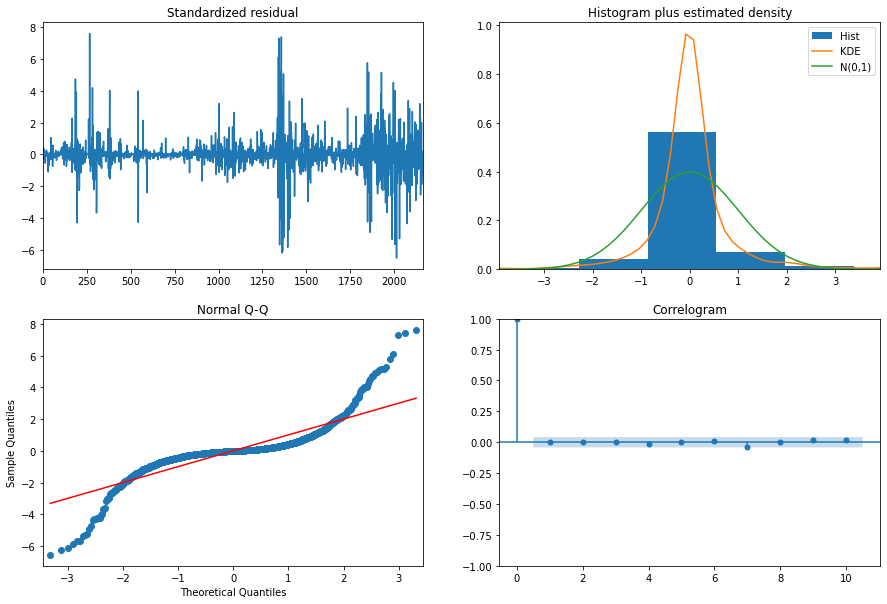

In [32]:
auto_arima(renau_Itraxx['Renault Credit Spread'], start_p=1, start_q=1,
                          max_p = None, max_q = None, seasonal = False,
                          m=1, start_P = 1, max_P = None, start_Q = 1, 
                          max_Q = None, d=None, D=None, trace=True,
                          error_action='ignore',  
                          suppress_warnings=True,  
                          stepwise=True).plot_diagnostics(figsize=(15,10));

Tout comme les spreads de crédit du DJ Itraxx X-over, une modélisation $GARCH$ s'avère nécessaire pour ces séries temporelles. Cet exemple nous montre clairement la difficulté de modéliser des séries temporelles financières avec des modèles de type $ARIMA$ ou $VARMA$. Les séries temporelles financières ont des propriétés assez complexes qui nécessitent des modèles spécifiques. Comme on l'a vu dans le notebook 1, pour prédire des séries temporelles, le court terme est le mieux car les séries temporelles financières étant des sytèmes ouverts donc soumis à tout type de perturbations externes, les modèles mathématiques, meme les plus sophistiqués, captent mal cet aléatoire. C'est pour cela que pour prédire des séries temporelles en finance, il faut toujours se projéter dans le court-terme.

On vient de voir que meme avec auto_arima, un modèle de type $VARMA$ était assez complexe a déterminer comme tenu du fait que les modèles de type $ARIMA$ fittent très mal les données. Une question se pose donc : Étant donné que le modèle de type $VARMA$ semble complexe et non adapté dans notre cas, comment modéliser alors notre série temporelle bivariée pour tenir compte conjointement de l'intéraction entre les spreads de crédit de Renault et celles du DJ Itraxx X-over ? En effet, un modèle $GARCH$ vectoriel semble compliqué et contient trop de paramètres. D'un autre coté, les modèles de type $ARIMA/VARMA$ nous donnent un controle et une compréhension des paramètres. C'est ainsi que l'on peut vérifier si oui ou non notre modèle est bon ou pas, s'il les paramètres sont significatifs ou non, si des tests statistiques sont vérifiés ou non, etc....


Toutes ces questions nous font donc entamer la partie finale de ce projet qui est l'avènement et l'utilisation des méthodes d'apprentissage automatique en finance. Ces dernières années, les méthodes de machine learning/deep learning ont permis de résoudre les problèmes les plus complexes qui soient, d'approximer des fonctions jusque là théoriquement complexes et de substituer souvent, des méthodes de monte-carlo. Dans cette partie par conséquent, nous allons modéliser et prédire notre série temporelle multivariée avec des modèles de deep learning. Le revers de la médaille en utilisant de telles méthodes est que l'on fait un sacrifice sur le controle et la compréhension du modèle au profit des résultats qu'ils nous fournit. Par conséquent, nous n'avons aucun controle sur les paramètres qu'apprend notre réseau de neurones.

#### DEEP LEARNING EN THÉORIE DES SÉRIES TEMPORELLES 

**Pourquoi le deep learning est valable pour modéliser des séries temporelles financières ou des séries temporelles tout court ?**

Deux raisons majeures justifient cette possibilité : 

- Une raison heuristique : Dans le deep learning par exemple, il existe une architecture de réseaux de neurones qui permet de modéliser des données séquentielles. Il s'agit des réseaux de neurones récurrents ou RNN ( Recurrent Neural Networks ) et des LSTM ( Long Short Term Memory ). Ces architectures permettent de modéliser des données dites chronologiques, par exemple du texte. Mais vu qu'une série temporelle est une séquence ordonnée d'observations chronologiques dans le temps, c'est la raison majeure pour laquelle le deep learning est utilisé en série temporelle. Le type de données que l'on veut modéliser correspond à une architecture prédéfinie existante qui lui est propre.



- Une raison mathématique : Théorème ( Appoximation universelle dans $L2$, Hornick $91$ ) : Soit $\sigma$ fonction d'activation bornée. Soit $\mu$ une mesure de proba sur $\mathbb{R}^\alpha$, alors pour tout $L \geq 2$, $\mathcal{NN}_{\infty}$ est dense dans $L^2\left(\mathbb{R}^a,\mu \right)$, ou $\mathcal{NN}_{\infty}$ représente l'ensemble des réseaux de neurones à $k$ couches et $\mathcal{NN}_{\infty}=\bigcup_{m \geqslant 1} \mathcal{NN}_{m}$ et $\mathcal{NN}_{m}$ représente un réseaux de neurones consitiués de $m$ neurones par couches. 

Mathématiquement parlant, toute variable aléatoire $L^P$ peut etre approximée par un réseau de neurones de $k$ couches avec au moins un neurone par couche. C'est ce qui justifie rigoureusement que l'on puisse calculer par exemple le prix de produits dérivés avec du deep learning car les payoffs sont dans $L^P$ et par un résultat de la théorie de la mésure, $L^P \subset L^2$, pour $P > 2$, donc approximable par un réseau de neurones. C'est ce qui justifie également que l'on modélise plusieurs phénomènes en Data Science avec des réseaux de neurones puisque les phénomènes que l'on étudie peuvent etre représentés par une fonction suffisamment régulière et dont le moment d'ordre $P$ est défini : Par exemple le texte, les vidéos, les audios, les prix de l'immobilier, etc...Tous ces phénomènes peuvent etre représentés comme des réalisations de variables aléatoires dont leurs moments d'ordre $P$ sont bien définis et par le théorème de Hornick, on peut l'approximer par du deep learning. Dans notre cas particulièrement, on voit triviallement que l'on peut utiliser du deep learning pour modéliser notre série temporelle multivariée.

Sans plus tarder, voyons comment nous pouvons créer des réseaux de neurones dans la pratique

**Comment créer des architectures de réseaux de neurones de manière pratique ?**

Pour créer des réseaux de neurones de manière pratique, il existe des frameworks dans des langages de programmation que l'on peut utiliser et qui sont vraiment optimisés. Parmi ces langages de programmation, nous pouvons citer R, Python et Java. Notons que Python est parmi ces derniers, le langage le plus populaire pour faire du deep learning car ce dernier contient les packages les plus matures et les plus optimisés pour l'intelligence artificielle, notamment les réseaux de neurones.

Il existe deux frameworks de deep learning majeurs en Python : 

- <a href='https://www.tensorflow.org/?hl=fr'>Tensorflow</a> : C'est une librairie qui a été créée par Google. Tensorflow est un framework optimisé et écrit en C++ haute performance qui permet de créer des modèles de deep learning assez complexes en très peu de temps. L'une des forces majeures de Tensorflow est qu'il a été le premier framework de deep learning à voir le jour sur Python et a été très appréciée de la communauté. Une autre force majeure de Tensorflow est qu'il permet de faire du déploiement de modèle de machine learning depuis la conception jusqu'à la production. Par conséquent, Tensorflow est un framework très orienté vers les entreprises, car il dispose de plusieurs outils de productivité non négligeables, est accessible, scalable, et compatible avec plusieurs autres librairies de machine learning. Ce fut l'une des premières à avoir été sur le marché et certaines entreprises comme Coca-Cola, Uber, Spotify l'utilisent dans leurs modèles de recommendations de produits et de services. 


- Les + de Tensorflow : 
     - Populaire donc facile a débugger 
     - Nous donne un niveau de controle plus soutenu de notre code car tient compte des détails
     - Scalable, éfficient, optimisé
     - Orienté vers la production 
     - Plusieurs modèles prèts à l'utilisation et a l'emploi 
     - Plusieurs bibliothèques prédéfinies éfficientes
     - Présente sur le cloud
     
- Les - de Tensorflow : 
     - Prise en main non évidente
     - Langage de bas niveau mais facilité par Keras
     - Difficilement customisable
     - Classes et fonctions assez fastidieuses pour implémenter un modèle de recherche



- <a href='https://pytorch.org'>Pytorch</a> : Pytorch a été une librairie dévéloppée par Facebook/META. Contrairement à Tensorflow, Pytorch a fait grandement sensation car il est plus "Pythonic" que Tensorflow. Ce que l'on entend par la, c'est que Pytorch nous permet de faire du deep learning mais en gardant les synthaxes de code le plus proche possible de Python, notamment numpy, de telle sorte que quelqu'un qui sait déjà coder en Python puisse le prendre en main très aisément. En ce sens, Tensorflow est en deep learning ce que C++ est aux langages de programmation et Pytorch est en deep learning ce que Python est aux langages de programmation : flexibilité, facilité, scalabilité et surtout un point qui a contribué au succès de Pytorch : **la customisation**. Pytorch est un des rares frameworks de deep learning que l'on peut customiser selon nos besoins et selon le contexte de modélisation dans lequel on se trouve. Par exemple Pytorch nous permet de combiner aisément plusieurs architectures de réseaux de neurones en un seul, nous permet de définir nous meme la "loss function" qui sied le plus a nos données, etc... Pytorch utilise également la programmation orientée objet qui permet de rendre scalable et flexible notre code. C'est la raison majeure pour laquelle Pytorch est beaucoup plus un framework de recherche en deep learning. C'est aussi la raison pourquoi il est très prisé et utilisé par les universitaires et les chercheurs en intelligence artificielle. À titre d'exemple, les modèles de recherches les plus récents en deep learning sont tous implémentés en Pytorch.


- Les + de Pytorch : 
    - Synthaxe de code agréable, facile à implémenter et à debugger
    - Customisable, éfficient, scalable
    - Récents modèles de deep learning implémentés et implémentables facilement 
    - Programmation orientée objet 
    - Tout est controlable, modulable
    - Forte communauté
    - Présente sur le cloud
    
- Les - de Pytorch : 
     - Très peu de modèles prédéfinies prètes à l'emploi : Tout doit etre customisée et fait par l'utilisateur 
     
     
     
Dans la suite de notre étude, nous allons utiliser Tensorflow qui a nos yeux contient les fonctions et librairies les plus pertinentes pour manipuler et modéliser les séries temporelles contrairement à Pytorch. 

In [33]:
import tensorflow as tf

Vérifions si Tensorflow a bien accès au calcul accéléré via un processeur graphique. C'est une composante métallique d'un ordinateur qui permet d'accélérer les calculs graphiques des tenseurs de deep learning.

In [34]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Tensorflow a bien accès a un accelérateur de calculs. On peut donc tourner sereinement notre modèle. 

**Train Test Split**

Comme vu dans le notebook 1, nous devons séparer nos données en deux : Une base d'entrainement et une base de test pour tester la performance de notre modèle et en considérant l'ordre chronologique de la série temporelle. Comme précédemment, nous avons considéré dans notre base de test 50 jours succéssifs des cours des spreads de crédit. 

In [35]:
train = renau_Itraxx.iloc[:-50]
test = renau_Itraxx.iloc[-50:]

Les réseaux de neurones sont connues pour bien performer avec des données normalisées. Pour ce faire, nous devons normaliser nos données afin d'obtenir des performances vraiment acceptables et éviter tout biais. Nous utilisons la 
fonction MinMaxScaler de scikit-learn.

In [36]:
from sklearn.preprocessing import MinMaxScaler

Lorsque l'on veut toujours normaliser nos données en machine learning, il est important de vérifier deux étapes : 

- fitter la donnée d'entrainement 

- Transformer à la fois la donnée d'entrainement et la donnée de test.

Il ne faut jamais fitter la donnée de test pour éviter des biais et des erreurs dans le modèle.

In [37]:
scaler = MinMaxScaler()

scaler.fit(train)

MinMaxScaler()

In [38]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

Une fois les données normalisées, nous devons encore faire une étape indispensable. Vu que nous possédons des données séquentielles et que vous voulons que notre réseau de neurones apprenne correctement les relations qui lient nos données, nous devons formater et préprocesser correctement la donnée dans ce sens. 

Par formater et préprocesser, nous entendons que nous devons transformer nos données séquentielles en un problème de machine learning supervisé, donc en deux bases : Une base d'observations qui pourra contenir le nombre de jours d'observations succéssifs de notre choix et servira de variables explicatives et de socle pour prédire cette fois des observations correspondantes au nombre de séries temporelles individuelles qui constituent notre série multivariée. Autrement dit, dans notre exemple, nous avons une série temporelle bivariée, donc deux séries temporelles qui intéragissent simultanément. Préprocesser nos données dans notre cas revient à choisir stratégiquement de manière séquentielle comme matrice X, le nombre d'observations que l'on souhaite avoir comme historique et comme matrice y, le couple de points correspondants à la suite séquentielle de notre historique de départ puisque nous avons deux séries temporelles, donc un couple de points. 

Contrairement à Pytorch, Tensorflow le fait aisément car disposant de librairies prédéfinies à cet effet. En Pytorch, on aurait du coder la méthode elle meme en évitant au maximum les boucles pour éviter d'avoir des temps assez longs sur de grosses bases de données. On peut le faire de manière éfficiente en numpy également.

In [39]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

Nous avons choisi arbitrairement 1 semaine donc 7 jours de données historiques séquentielles et consécutives pour prédire un couple de points correspondant aux observations simultanées des spreads du DJ Itraxx et celles de Renault. 

In [40]:
length = 7 
batch_size = 1 
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [41]:
len(generator) 

2112

In [42]:
X,y = generator[0]

In [43]:
print(f'Chaque colonne du tableau:\n{X}')
print(f'permet de prédire de manière séquentielle chaque colonne du tableau:\n{y}')

Chaque colonne du tableau:
[[[0.18035703 0.10662429]
  [0.21597256 0.1136801 ]
  [0.23645149 0.11656656]
  [0.22220528 0.11260132]
  [0.18748014 0.10805295]
  [0.2052879  0.10971485]
  [0.19371286 0.11467141]]]
permet de prédire de manière séquentielle chaque colonne du tableau:
[[0.19193208 0.11467141]]


Nos données sont prètes. Elles sont normalisées et se présentent sous forme de données de machine learning supervisés. Nous avons la matrice X qui représente la matrice des observations des variables explicatives et la matrice y qui représente les valeurs obtenues. Nous pouvons donc tourner notre modèle de deep learning. 

Notre modèle de deep learning consistera en un modèle de LSTM car c'est l'architecture le mieux adapté pour nos données. En effet, en traitement de texte, les LSTM sont très utilisés pour tenir compte de la mémoire à court terme des mots. Ce qui produit des résultats vraiment incroyables. Dans notre cas, les LSTM tiendront compte de la mémoire à court terme de nos observations des spreads de crédit.

In [44]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,LSTM

In [45]:
scaled_train.shape

(2119, 2)

On construit notre modèle en Tensorflow.

In [46]:
tensorflow.random.set_seed(42)

# Définir les entrées, supposer que l'entrée est déjà 3D (batch_size, timesteps, features)
entrees = layers.Input(shape=(length, scaled_train.shape[1]))

# Ajouter une couche LSTM
x = layers.LSTM(128)(entrees)

# Couche de sortie
sortie = layers.Dense(scaled_train.shape[1])(x)

# Créer le modèle
model = tf.keras.Model(inputs=entrees, outputs=sortie)

# Compiler le modèle
model.compile(loss="mse",
                  optimizer=tf.keras.optimizers.Adam())

Metal device set to: Apple M1


2023-07-06 19:44:51.266807: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-06 19:44:51.267150: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


On affiche le summary ou le modèle que l'on s'apprète à tourner. On peut voir que notre modèle de DL contient 67.330 paramètres à estimer. C'est énorme ! C'est la raison pour laquelle on disait précédemment que l'on accepte de sacrifier l'interprétabilité de nos modèles au profit des résultats du réseau de neurones. Utiliser un réseau de neurones implique l'estimation d'énormément de paramètres. La contrepartie est qu'il nous donne de très bons résultats a la sortie.

In [47]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7, 2)]            0         
                                                                 
 lstm (LSTM)                 (None, 128)               67072     
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 67,330
Trainable params: 67,330
Non-trainable params: 0
_________________________________________________________________


In [48]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, 
                                           length=length, batch_size=batch_size)

On fitte le modèle.

In [49]:
model.fit_generator(generator,epochs=10,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/10


2023-07-06 19:44:51.706426: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-07-06 19:44:52.748249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-06 19:44:52.934980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-06 19:44:53.138141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2108/2112 [============================>.] - ETA: 0s - loss: 0.0021

2023-07-06 19:45:19.443707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-06 19:45:19.507180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2112/2112 [==============================] - 28s 13ms/step - loss: 0.0021 - val_loss: 0.0010
Epoch 2/10
2112/2112 [==============================] - 26s 12ms/step - loss: 8.9730e-04 - val_loss: 0.0018
Epoch 3/10
2112/2112 [==============================] - 26s 12ms/step - loss: 6.6180e-04 - val_loss: 5.5231e-04
Epoch 4/10
2112/2112 [==============================] - 27s 13ms/step - loss: 5.9081e-04 - val_loss: 4.9027e-04
Epoch 5/10
2112/2112 [==============================] - 26s 12ms/step - loss: 5.5770e-04 - val_loss: 0.0013
Epoch 6/10
2112/2112 [==============================] - 26s 12ms/step - loss: 5.3446e-04 - val_loss: 4.3457e-04
Epoch 7/10
2112/2112 [==============================] - 26s 12ms/step - loss: 5.3897e-04 - val_loss: 3.9542e-04
Epoch 8/10
2112/2112 [==============================] - 26s 12ms/step - loss: 5.0838e-04 - val_loss: 4.7041e-04
Epoch 9/10
2112/2112 [==============================] - 26s 12ms/step - loss: 5.0982e-04 - val_loss: 6.9037e-04


In [50]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

On représente graphiquement l'erreur ou losses calculée durant la phase d'entrainement.

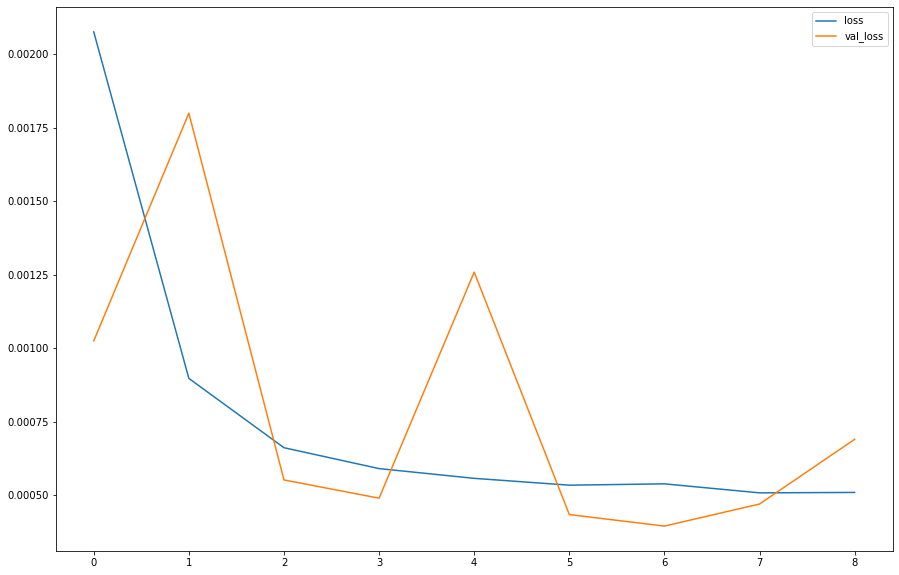

In [51]:
losses = pd.DataFrame(model.history.history)
losses.plot(figsize=(15,10))
plt.show()

On fait des prédictions avec notre modèle pour le comparer avec les données de test. 

In [52]:
n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
   
    current_pred = model.predict(current_batch)[0]
    
    
    test_predictions.append(current_pred) 
    
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

2023-07-06 19:48:50.386495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-06 19:48:50.436405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


N'oublions pas de faire une transformation inverse pour revenir aux observations de départs car nous avons normalisé nos données

In [53]:
true_predictions = scaler.inverse_transform(test_predictions)

Affichons la base de test initiale

In [54]:
test

,Itraxx Credit Spread,Renault Credit Spread
Timestamp,,
2023-03-13,388.59,165.060
2023-03-14,378.10,160.610
2023-03-15,378.10,172.880
2023-03-16,406.13,174.330
2023-03-17,415.86,178.090
2023-03-20,442.50,189.440
2023-03-21,414.00,175.250
2023-03-22,408.50,170.200
2023-03-23,426.00,179.660


Affichons la base de prédictions données par le réseau de neurones

In [55]:
true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns)
true_predictions

,Itraxx Credit Spread,Renault Credit Spread
0,341.239388,154.558561
1,332.313702,153.819499
2,324.962901,152.073935
3,316.544336,149.790297
4,308.313779,147.384551
5,300.686472,145.129216
6,293.769273,143.118198
7,287.286011,141.321261
8,281.258123,139.689853
9,275.664867,138.202774


Comme on peut le voir, notre réseau de neurones nous donne bien en sortie deux colonnes d'observations, donc un tuple : celui des spreads de crédit de l'Itraxx et celui des spreads de Renault. On peut l'étendre à plus de deux cette sortie. Cette flexibilité d'adaptabilité est la raison pour laquelle les LTSM/RNN sont utilisés pour modéliser les séries temporelles multivariées. 


Enfin, nous allons calculer des métriques qui permettent de quantifier la performance de notre modèle. Nous avons à cet effet, coder nous meme des métriques de performance de modèles de deep learning sur des séries temporelles : 

- Les MAE ou Mean Absolute Squared Error  

- Les MSE ou Mean Squared Error 

- Les RMSE ou Root Mean Squared Error 

- Les MAPE ou Mean Absolute Percentage Error 

- Les MASE ou Mean Absolute Scaled Error


Les deux dernières métriques sont des métriques de compétitions de deep learning en série temporelle. Les MAPE par exemple nous donnent le niveau de pourcentage d'erreur commise d'une prédiction à une autre pour avoir des résultats chirurgicaux. Par soucis de clarté, nous n'avons pas tenu à expliciter les formules mathématiques de ces métriques. 

In [56]:
def mean_absolute_scaled_error(y_true, y_pred):
    
    """
       Cette fonction calcule le Mean Absolute Scaled Error de tous nos futurs modèles de Deep Learning
       
    """
    
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
    
    return mae / mae_naive_no_season

In [57]:
def evaluate_preds(y_true, y_pred):
    
    y_true = tf.cast(y_true, dtype = tf.float32)
    y_pred = tf.cast(y_pred, dtype = tf.float32)
    
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    
    if mae.ndim > 0: 
        
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)
    
    return {'mae':mae.numpy(),
           'mse':mse.numpy(),
           'rmse':rmse.numpy(),
           'mape':mape.numpy(),
           'mase':mase.numpy()}

In [58]:
evaluate_preds(test,true_predictions)

{'mae': 104.467224,
 'mse': 13823.252,
 'rmse': 113.794975,
 'mape': 34.783382,
 'mase': 14.591391}

On voit ici que notre modèle de deep learning semble assez bon. En effet la métrique MAE est $\sim$ à $102.055$. Cela signifie que l'écart entre les spreads de crédit dans la réalité donc dans le jeu de test et celui prédit par le modèle de deep learning est en moyenne $+/-$ de $102.055$. Ce qui est extrèmement bon et satisfaisant pour un modèle de LSTM d'une seule couche avec 128 neurones sur cette couche. Cela nous montre donc la force et la performance des modèles d'apprentissage statistiques sur les séries temporelles. Ils permettent donc de prédire et d'apprendre des relations complexes en peu de temps. Mais l'interprétabilité reste assez floue meme si ces derniers temps des méthodes scientifiques comme SHAP permettent de justifier les variables explicatives utilisées dans un modèle d'apprentissage. Ce qui marque donc la fin de notre projet final.

In [59]:
# model.save('lstm_model_on_credit_spread.h5')

### GRANDE CONCLUSION

Au terme de notre analyse, nous pouvons dire que la prédiction de séries temporelles financières reste un challenge toujours d'actualité. En effet, étant des systèmes ouverts, le niveau d'imprévisibilité reste de premier ordre. Par conséquent, il est toujours judicieux de projéter ses prédictions sur du court terme. 

Lorsque l'on veut modéliser une série temporelle univariée, nous pouvons utiliser soit des modèles linéaires de type $ARIMA$. Pour éviter que la complexité du code n'augmente, on peut se servir de la fonction auto_arima développée sur R ou Python. Plus particulièrement, lorsque l'on modélise des séries temporelles financières, on démontre que des modèles de type $GARCH$ sont nécéssaires et captent plus d'informations que les modèles linéaires. 

En revanche, lorsque l'on étudie les séries temporelles mutlivariées, la complexité des modèles augmente. Il n'est pas toujours évident de déterminer l'ordre optimal des modèles de type $VARMA$. Pour contrecarrer cette complexité, au prix de l'interprétabilité, on peut utiliser des modèles de deep learning, qui donnent des résultats vraiment intéréssants. Ce qui nous amène donc à un constat : Il faut utiliser les modèles de deep learning lorsqu'ils sont nécessaires. Si on peut utiliser des modèles ordinaires ou linéaires, il est toujours conseillé de laisser les méthodes d'apprentissage automatique. On aurait pu utiliser des méthodes d'apprentissage sur des séries temporelles univariées, mais cela n'aurait aucun impact significatif à part donner des résultats plus chirurgicaux et augmenter la complexité du code. 


Il existe a cet effet, une large diversité d'architectures de modèle de deep learning de nos jours pour les séries temporelles univariées et mutlivariées. On peut citer entre autre les $Bi-LSTM$, les $CNN-LSTM$, les $CNN-Bi-LSTM$, les $TCN-Bi-LSTM$, les $TRANSFORMERS$, les $CNN-TRANSFORMERS$, les $MDN-Bi-LSTM$, etc.... Un très bon article qui résume ces méthodes toutes codées en Tensorflow se trouve sur le site Medium : <a href='https://medium.com/@dave.cote.msc/hands-on-advanced-deep-learning-time-series-forecasting-with-tensors-7facae522f18'>Deep learning : Méthodes avancées de prédiction de séries temporelles.</a>


En outre, il existe des compétitions internationales de prédictions de séries temporelles en deep learning comme le fameux $M4$, compétition de renommée internationale et très pointue. En 2020 par exemple, l'algorithme gagnant est le papier recherche sur les $N-BEATS$ ou **N**eural **B**asis **E**xpansion **A**nalysis for Interpretable **T**ime **S**eries Forecasting qui atteignit un score de prédiction jamais égalé pendant des compétitions antérieures et dont voici le papier de recherche : <a href='http://mapdic.com/upload/2022/07/param-a3aa083f4dc74071814b8986acf28c71.pdf'>$N-BEATS$</a>. À titre d'exemple, depuis que l'algorithme vainqueur du M4 en 2013 était une algorithme de machine learning, les statistiques démontrent aujourd'hui que d'une part,les modèles de ML/DL sont utilisés par la pluspart des compétiteurs, d'autre part que le nombre d'architectures et d'algorithmes de DL pour séries temporelles ont explosé depuis 2013 et enfin que ces derniers surperforment de loin les méthodes traditionnelles.

Ce exemple montre à quel point de nos jours, les méthodes d'apprentissage automatique peuvent s'avérer plus chirurgicales que des méthodes linéaires et pourquoi il devient de plus en plus impossible de s'en passer. Mais les méthodes linéaires restent encore une référence de part leurs simplicités et constitue un benchmark pour les méthodes d'apprentissage automatique. 


Ce projet nous a permis également d'utiliser un langage de programmation très performant qui est Python. Il nous a permis de mettre en exergue, la diversité et la multitude de fonctions pratiques qui nous ont permis de modéliser nos séries temporelles. Par exemple la librairie statsmodels de Python pour faire de la statistique, la librairie pmd_arima et sa fonction auto_arima, la librairie Tensorflow pour son éfficience dans l'élaboration des réseaux de neurones. Il nous a suffi juste d'importer toutes les librairies dont on avait besoin dans un seul langage. C'est la raison pour laquelle Python est un des langages les plus utilisés en finance quantitative et en data science. La diversité des librairies, l'efficience, la scalabilité et la maturité de ses frameworks en font un langage de choix parmi de nombreux professionnels de nos jours. Et ce n'est pas tout. Toutes les librairies et fonctionnalités que nous avons utilisées dans ce projet ne sont qu'une infime partie de fonctionnalités de ce que ces dernières sont capables de faire réellement et donc une infime partie de Python. 

### AUTRES RESSOURCES : SKTIME

En 2020, une librairie de modélisation et de prédictions de séries temporelles fut crée en Python pour rendre l'étude des séries temporelles plus faciles, plus optimales et **unifiée dans un seul framework**. Cette librairie s'appelle <a href='http://www.sktime.net/en/latest/'>sktime</a>. 

Qu'est ce donc la librairie <a href='http://www.sktime.net/en/latest/'>sktime</a> de Python ? 
En une phrase : <a href='http://www.sktime.net/en/latest/'>sktime</a> est le <a href='https://scikit-learn.org/stable/'>scikit-learn</a> des séries temporelles, de la meme manière que <a href='https://pytorch.org'>Pytorch</a> est le <a href='https://numpy.org'>numpy</a> du deep learning. Ce que l'on entend par là, c'est que sktime est une librairie qui a pour philosophie de respecter au maximum le nom des fonctions de scikit-learn mais cette fois appliquée sur les séries temporelles. Ce qui signifie que si nous savons manipuler scikit-learn, sktime sera juste une conséquence, puisque la prise en main sera immédiate. C'est la meme philosophie que Pytorch a adopté en deep learning. Si nous savons manipuler numpy, Pytorch sera juste une conséquence puisque la pluspart des fonctions numpy sont reprises dans Pytorch mais adaptés pour du deep learning.

Comme dit précédemment, <a href='http://www.sktime.net/en/latest/'>sktime</a> nous permet de faire de la modélisation de série temporelle dans un framework unifié. Qu'est ce que cela signifie t'il conrètement ? Cela signifie que tous les codes et les analyses que l'on a tourné sur nos notebooks pouvent etre fait en maximum ....... $\sim$ $9$ ou $10$ lignes. Un framework unifié signifie que tous ce dont on aura besoin dans la modélisation se trouve dans un seul et meme endroit, et en plus, écrite de manière orientée objet. L'orienté objet aura pour conséquence d'importer et d'utiliser plusieurs instances de méthodes déjà prédéfinies et prètes pour utilisation comme dans scikit-learn. 

Par exemple, scikit-learn dispose d'une fonction <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html'>train_test_split</a> qui permet de séparer nos données en base d'entrainement et de test. Dans la meme lignée, sktime possède bien une fonction <a href='http://www.sktime.net/en/latest/api_reference/auto_generated/sktime.forecasting.model_selection.temporal_train_test_split.html'>temporal_train_test_split</a> qui permet en **une ligne de code** de splitter les données d'une série temporelle en respectant l'ordre chronologique des observations en base d'entrainement et de test. Que faire si je veux utiliser auto_arima de la libraire pmd_arima ? sktime possède bien une fonction <a href='http://www.sktime.net/en/latest/api_reference/auto_generated/sktime.forecasting.arima.AutoARIMA.html'>AutoARIMA</a> qui détermine l'ordre optimal de notre modèle de série temporelle sans avoir besoin de libairie externe. Et si je veux utiliser une métrique de performance pour les compétitions de séries temporelles comme les MAPE ou MASE ? sktime possède une pléthore de métriques de séries temporelles ( compétitions ou non ) : <a href='https://www.sktime.net/en/latest/api_reference/performance_metrics.html'>sktime.performance_metrics.forecasting</a> et bien d'autres. 


Ci joint un exemple de code d'utilisation de sktime. Nous allons considérer seulement la données de spreads de crédit du DJ Itraxx X-over 3Y.

In [60]:
itraxx = renau_Itraxx[['Itraxx Credit Spread']]

In [61]:
itraxx.head()

,Itraxx Credit Spread
Timestamp,
2015-01-02,240.53
2015-01-05,260.53
2015-01-06,272.03
2015-01-07,264.03
2015-01-08,244.53


In [62]:
import sktime

Splitter nos données en base d'entrainement et base de test

In [63]:
from sktime.forecasting.model_selection import temporal_train_test_split

In [64]:
itraxx_train, itraxx_test = temporal_train_test_split(itraxx['Itraxx Credit Spread'],test_size=0.2) # 20% des données en base de test  

Affichage des données splitées

In [65]:
itraxx_train.head(3), itraxx_test.head(3)

(Timestamp
 2015-01-02    240.53
 2015-01-05    260.53
 2015-01-06    272.03
 Name: Itraxx Credit Spread, dtype: float64,
 Timestamp
 2021-09-17    161.75
 2021-09-20    186.50
 2021-09-21    183.75
 Name: Itraxx Credit Spread, dtype: float64)

Temps de passer à la modélisation ! Utilisons AutoArima de sktime pour voir comment il modélise les données.

In [66]:
from sktime.forecasting.arima import AutoARIMA

In [67]:
forecaster = AutoARIMA(sp=1)  # sp = 1 car pas de saisonnalité

In [68]:
forecaster.fit(itraxx_train)  # étape classique en python. On fit ! 

/Users/nacersere/miniforge3/envs/mydeeplearningstation_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nacersere/miniforge3/envs/mydeeplearningstation_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nacersere/miniforge3/envs/mydeeplearningstation_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AutoARIMA()

Pour faire de la prédiction, il faut que l'on dispose des dates futures pour lesquelles le modèle va nous donner des observations. Autrement dit, on doit disposer de l'horizon de projection. 

Dans notre cas, notre horizon de projection correspond à la taille de la base de test puisque nous voulons comparer les performances du modèle sur la base de test.

2 lignes de codes suffisent à les obtenir sur sktime.

In [69]:
from sktime.forecasting.base import ForecastingHorizon  

In [70]:
fh_abs = ForecastingHorizon(itraxx_test.index, is_relative=None, freq='B')  

On fait la prédiction de notre modèle 

In [71]:
itraxx_preds = forecaster.predict(fh=fh_abs)

On affiche les résultats sous forme de représentation graphique

In [72]:
from sktime.utils.plotting import plot_series

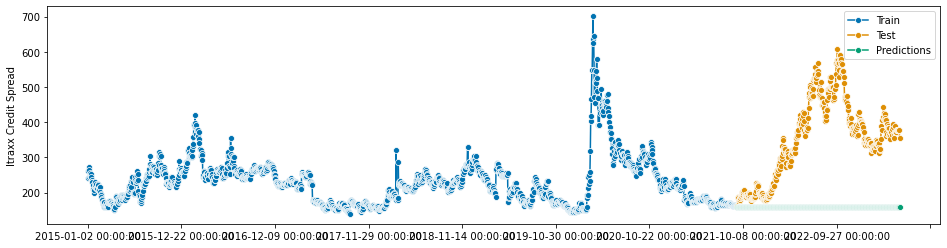

In [73]:
plot_series(itraxx_train,itraxx_test,itraxx_preds,labels=['Train','Test','Predictions'])
plt.show()

On peut quantifier facilement les métriques de performances de notre modèle 

In [74]:
from sktime.performance_metrics.forecasting import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [75]:
{'MAE':mean_absolute_error(itraxx_test,itraxx_preds),
'MSE':mean_squared_error(itraxx_test,itraxx_preds),
'MAPE':mean_absolute_percentage_error(itraxx_test,itraxx_preds)}

{'MAE': 193.77727563608536,
 'MSE': 50115.656527866966,
 'MAPE': 0.49234848007999116}

Ce que confirme que les modèles de type $ARIMA$ ne sont pas adaptés à la donnée. On a $\sim$ $13$ lignes de code que l'on vient de tourner pour faire des analyses très complexes en quelques minutes. C'est là ou réside la force de sktime. Un framework unique.

Ceci marque la fin de notre projet et conclut les analyses.